In [1]:
# Imports
import os
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [2]:
# Set local directory
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/ubuntu/diabetes_detection'

In [3]:
# Import local libraries
from src.logger import set_logger as sl
from src.plot_roc import plot_roc_curve

In [4]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Use only one class case/control
data = []
label = []
for i, d in enumerate(zip(X,y)):
    if d[1] == 2:
        continue
    else:
        data.append(d[0])
        label.append(d[1])
data = np.array(data)
label = np.array(label)

In [6]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(3)
n_samples, n_features = data.shape
data = np.c_[data, random_state.randn(n_samples, 200 * n_features)]

In [7]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Receiver operating characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

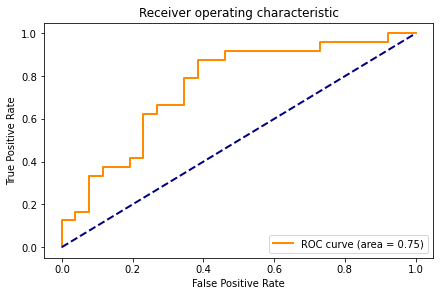

In [8]:
plot_roc_curve(fpr, tpr, roc_auc)